# *ANN -Artificial Neural Network*

### *Analysis objective :<br>Applying -ANN- model on the prediction of -gender- as a target Feature*
---

In [122]:
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
matplotlib.rcParams["figure.figsize"]=(20,10)
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder_category=LabelEncoder()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import (r2_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix)
import warnings
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

In [158]:
df=pd.read_csv(r"C:/Users/Omar\Desktop/Omar_Files/Python_Analysis/DeepLearning_ANN/DataSet/data_car.csv")
df=df.drop(["X_OBSTAT_","clm","numclaims"],axis=1)
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0.0,HBACK,3,F,C,2
1,1.03,0.648871,0.0,HBACK,2,F,A,4
2,3.26,0.569473,0.0,UTE,2,F,E,2
3,4.14,0.317591,0.0,STNWG,2,F,D,2
4,0.72,0.648871,0.0,HBACK,4,F,C,2


In [159]:
df=df.sort_values(by=['veh_age', 'agecat','area','gender']).reset_index().drop("index",axis=1)
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.59,0.229979,0.0,SEDAN,1,F,A,1
1,1.46,0.221766,0.0,HBACK,1,F,A,1
2,1.54,0.238193,0.0,SEDAN,1,F,A,1
3,1.57,0.522930,0.0,SEDAN,1,F,A,1
4,1.41,0.219028,0.0,HBACK,1,F,A,1


---

In [125]:

categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 3 numerical features : ['veh_value', 'exposure', 'claimcst0']

we have 5 categorical features : ['veh_body', 'veh_age', 'gender', 'area', 'agecat']


In [126]:
discrete_feature=[feature for feature in numerical_features if  len(df[feature].unique())<=25]
countinuous_feature=[feature for feature in numerical_features if  len(df[feature].unique())>25]

In [127]:
print("we have {} discrete feature : {}\n".format(len(discrete_feature),(discrete_feature)))
print("we have {} countinuous feature : {}".format(len(countinuous_feature),(countinuous_feature)))

we have 0 discrete feature : []

we have 3 countinuous feature : ['veh_value', 'exposure', 'claimcst0']


In [128]:
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

In [129]:
x=df.drop("agecat",axis=1)
y=df["agecat"]

In [130]:
x[countinuous_feature].skew(axis=0,skipna=True)

veh_value     2.968022
exposure      0.175557
claimcst0    17.502503
dtype: float64

In [134]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
transform_features=['veh_value']
df[transform_features]=pt.fit_transform(x[transform_features])

In [135]:
df[transform_features].skew(axis=0,skipna=True)

veh_value    0.010369
dtype: float64

In [136]:
from imblearn.combine import SMOTETomek,SMOTEENN
smt=SMOTEENN(random_state=42,sampling_strategy="minority")
x_re,y_res=smt.fit_resample(x,y)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_re,y_res ,test_size= 0.2,random_state=42)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (3014, 7) and Y = (3014,) : 
Test data shape of X = (754, 7) and Y = (754,) : 


In [138]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

* *Importing Tensorflow :*

In [139]:
import tensorflow as tf

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

* *Model Preparation :*

In [141]:
classifier=Sequential()

* *1st Hidden Layer :*

In [142]:
classifier.add(Dense(units=7,activation="ReLU"))

* *2nd Hidden Layer :*

In [143]:
classifier.add(Dense(units=14,activation="ReLU"))

* *Last Layer -Output :*

In [144]:
classifier.add(Dense(6,activation="softmax"))

* *Adam Optimizer Preparation :*

In [145]:
import tensorflow
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

* *Compiling the Model :*

In [146]:
classifier.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# categorical_crossentropy

* *Early Stopping Preparation :*

In [147]:
import tensorflow
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

* *Model Fitting :*

In [148]:
model_history=classifier.fit(x_train,y_train,validation_split=.33,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
64/64 [==============================] - 1s 4ms/step - loss: 0.8625 - accuracy: 0.7900 - val_loss: 0.7533 - val_accuracy: 0.8040
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.8162 - val_loss: 0.7341 - val_accuracy: 0.8040
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.8162 - val_loss: 0.7404 - val_accuracy: 0.8040
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.8162 - val_loss: 0.7249 - val_accuracy: 0.8040
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.8162 - val_loss: 0.7239 - val_accuracy: 0.8040
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.8162 - val_loss: 0.7267 - val_accuracy: 0.8040
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.8162 - val_loss: 0.7229 - val_accuracy: 0.8040
Epoch 

In [149]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

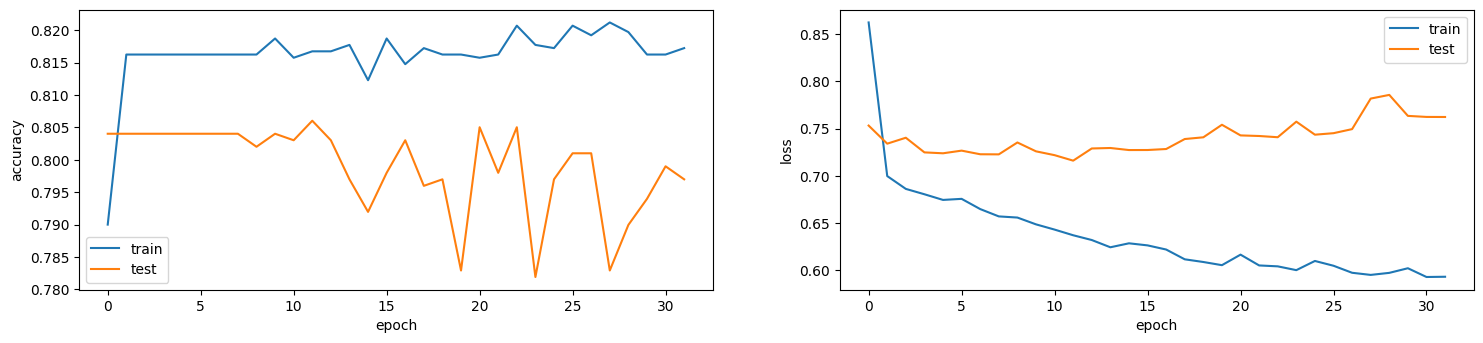

In [150]:
plt.figure(figsize=(18, 8))
plt.subplot(221)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"]);


plt.subplot(222)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"]);

In [151]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 14)                112       
                                                                 
 dense_14 (Dense)            (None, 6)                 90        
                                                                 
Total params: 258 (1.01 KB)
Trainable params: 258 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
y=classifier.predict(x_test)

24/24 [==============================] - 0s 2ms/step


In [153]:
classifier.evaluate(x_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.8355


[0.65133136510849, 0.8355437517166138]

In [154]:
accuracy = classifier.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy[1]}")

24/24 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.8355
Test accuracy: 0.8355437517166138


In [155]:
import numpy as np
predicted_classes = np.argmax(y, axis=1)
len(predicted_classes)

754

In [156]:
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[625   1   1   0   0   0]
 [ 18   1   0   0   0   0]
 [ 37   1   3   0   1   0]
 [ 44   0   0   1   0   0]
 [ 14   0   0   0   0   0]
 [  7   0   0   0   0   0]]


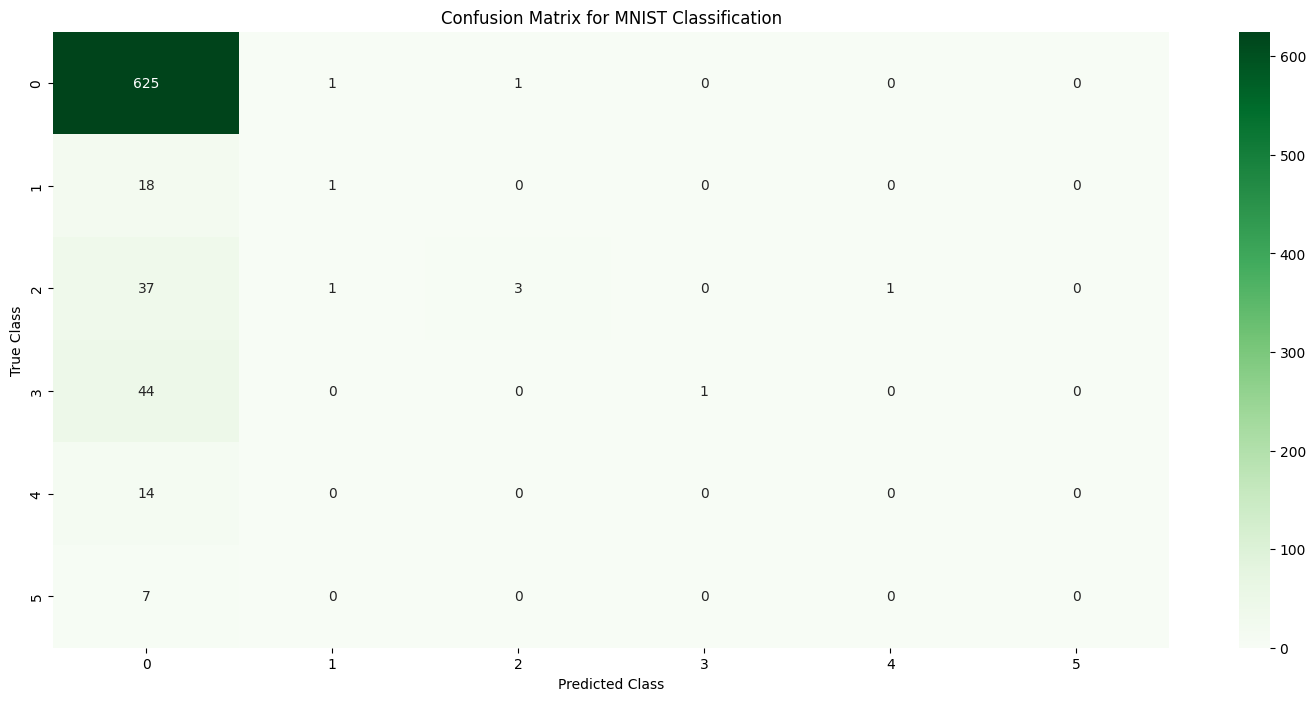

In [157]:
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()